# 신용카드 사용자 연체 예측 AI 경진대회 EDA 
**사용자의 신용카드 대금 연체 정도를 예측 By 신용카드 사용자들의 개인 신상정보 데이터**

#### import library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# #from catboost import CatBoostClassifier
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier

#### Font Settings for Mac & Windows

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system() 

    if system_name == 'Darwin': 
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab) 
        !apt-get install fonts-nanum -qq > /dev/null 
        !fc-cache -fv 

        import matplotlib as mpl
        mpl.font_manager._rebuild() 
        findfont = mpl.font_manager.fontManager.findfont 
        mpl.font_manager.findfont = findfont 
        mpl.backends.backend_agg.findfont = findfont 

        font_family = "NanumBarunGothic" 
    return font_family

In [3]:
# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

#### Import Data

In [4]:
import os 
os.chdir('../credit-now/original_data')
os.getcwd()

'/Users/seunguk/Documents/likelion/credit-now/original_data'

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

#### Explore Data

In [6]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [7]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [8]:
train.shape

(26457, 20)

In [9]:
test.shape

(10000, 19)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

`occyp_type` 18286 null 값 존재

In [11]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [12]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


#### Extract Null Values

In [13]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

#### EDA Raw data Visualization 

In [14]:
# 주의: 조금 오래걸림 (13s)
# sns.pairplot(train, hue = 'credit') 
# plt.title('train Data의 Pair plot')
# plt.show()

F    17697
M     8760
Name: gender, dtype: int64


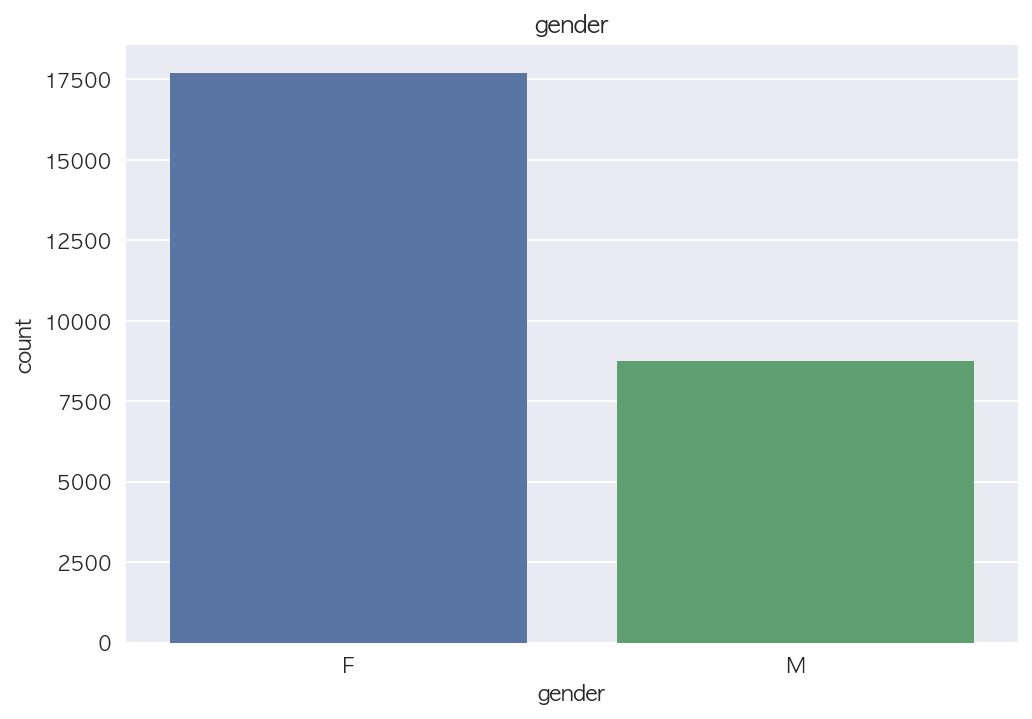

In [15]:
# gender 성별
print(train['gender'].value_counts())
sns.countplot(data = train, x = 'gender') 
plt.title('gender')
plt.show() 
# sns.jointplot(data = train, x = 'gender', y = 'credit')

In [16]:
# sns.distplot(data = train, x = 'credit', hue = 'gender')

남녀 숫자 차이가 심함 성별에 따른 분석 시행시 층화추출 Stratified random sampling 필요

N    16410
Y    10047
Name: car, dtype: int64


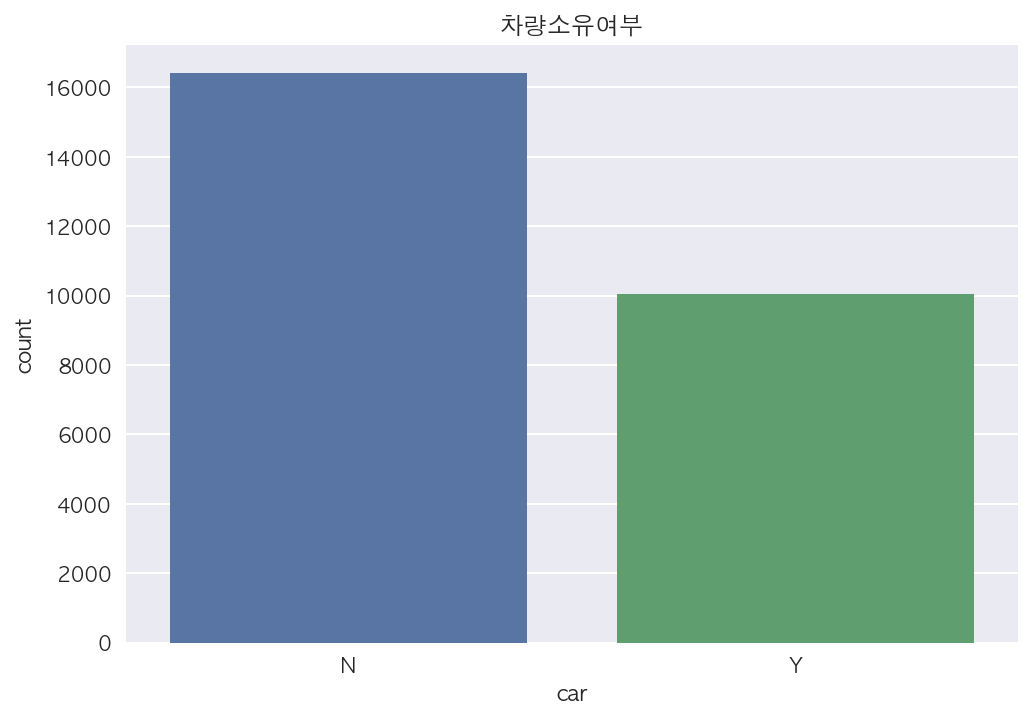

In [17]:
# car 차량 소유여부
print(train['car'].value_counts()) 
sns.countplot(data = train, x = 'car')
plt.title('차량소유여부')
plt.show()

Y    17830
N     8627
Name: reality, dtype: int64


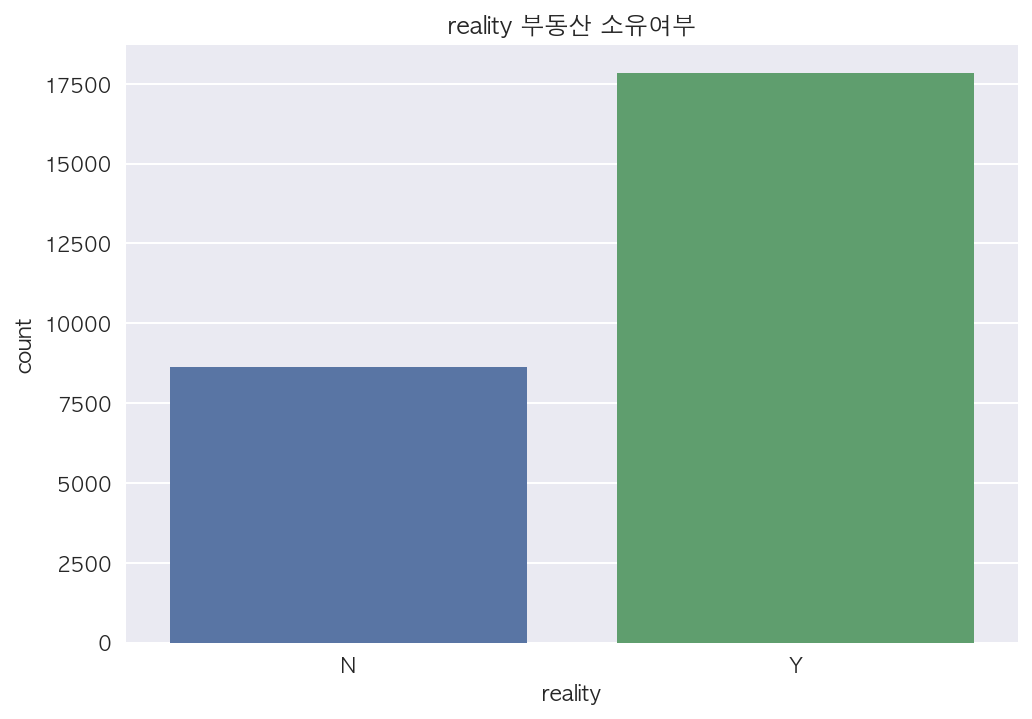

In [18]:
# reality 부동산 소유 여부
print(train['reality'].value_counts())
sns.countplot(data = train, x = 'reality') 
plt.title('reality 부동산 소유여부')
plt.show() 

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64


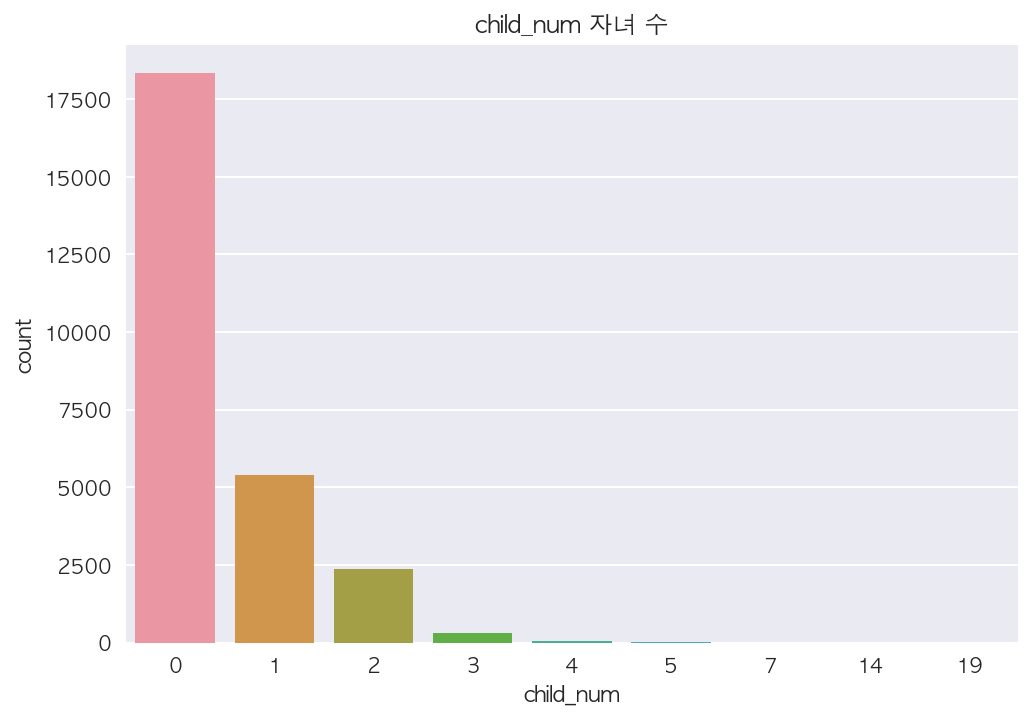

In [19]:
# child_num 자녀수
print(train['child_num'].value_counts())
sns.countplot(data = train, x = 'child_num') 
plt.title('child_num 자녀 수')
plt.show() 

Data 불균형이 심함 3, 4, 5, 7, 14, 19 존재 
이상치 처리만 하고 로그스케일, 표준화, min-max 까지 필요하진 않을듯

135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
57150.0        1
51750.0        1
87448.5        1
227250.0       1
191700.0       1
Name: income_total, Length: 249, dtype: int64


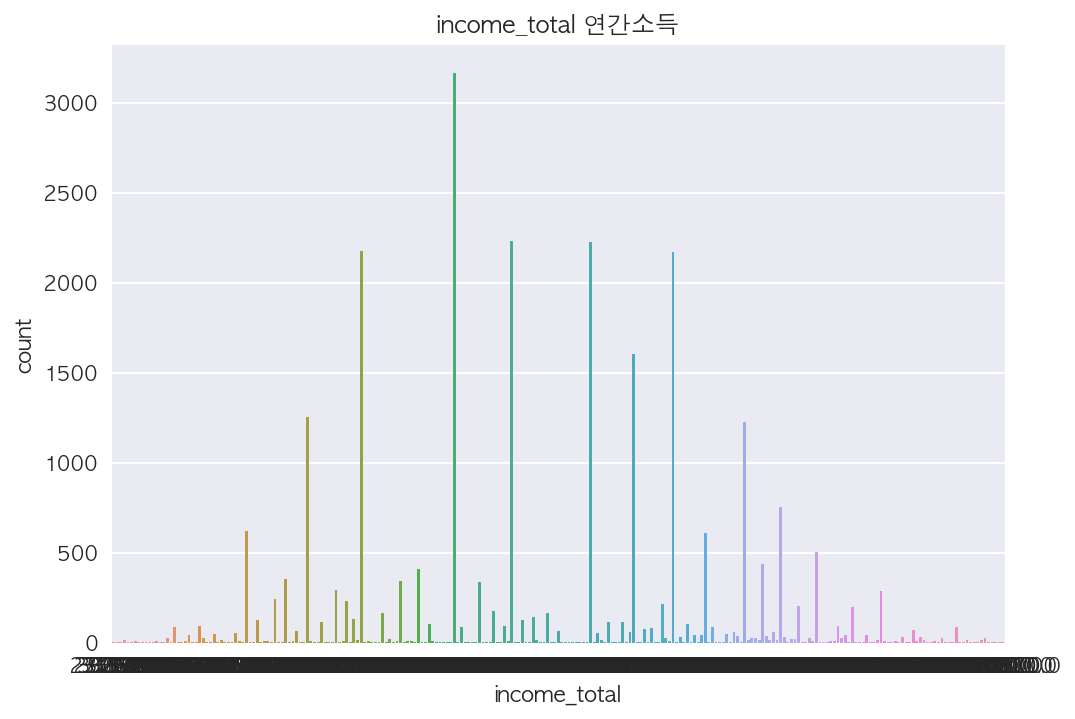

In [20]:
# income_total 연간소득
print(train['income_total'].value_counts())
sns.countplot(data = train, x = 'income_total') 
plt.title('income_total 연간소득')
plt.show() 

Text(0.5, 1.0, 'income_total 연간소득')

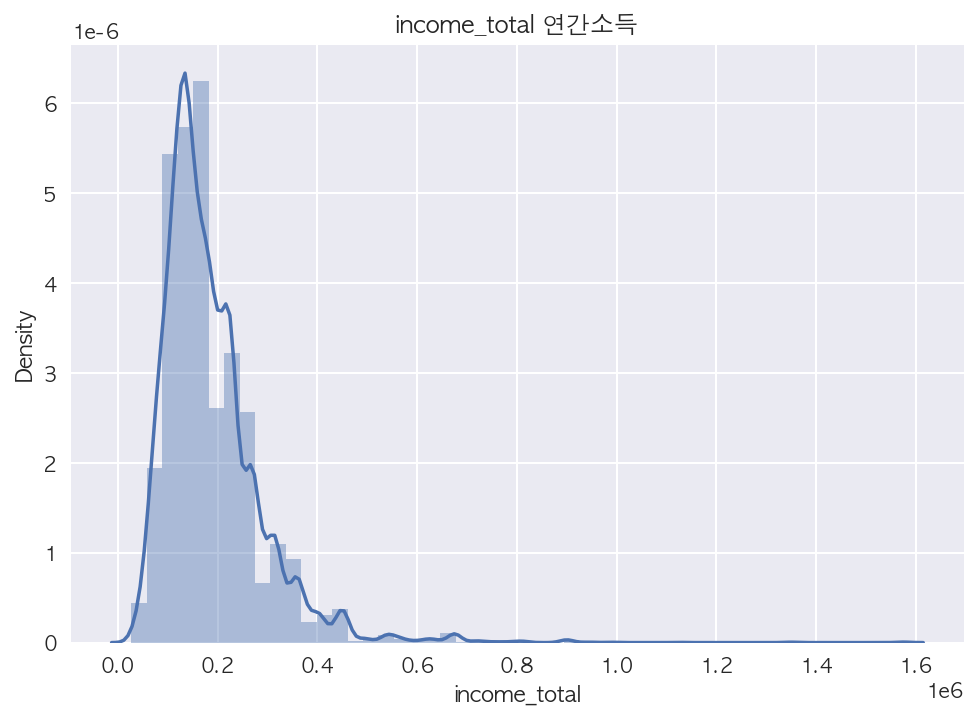

In [21]:
sns.distplot(train['income_total'])
plt.title('income_total 연간소득')

독특하게도 소득이 연속형 데이터가 아님 특정 소득에 사람들이 몰려있음

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64


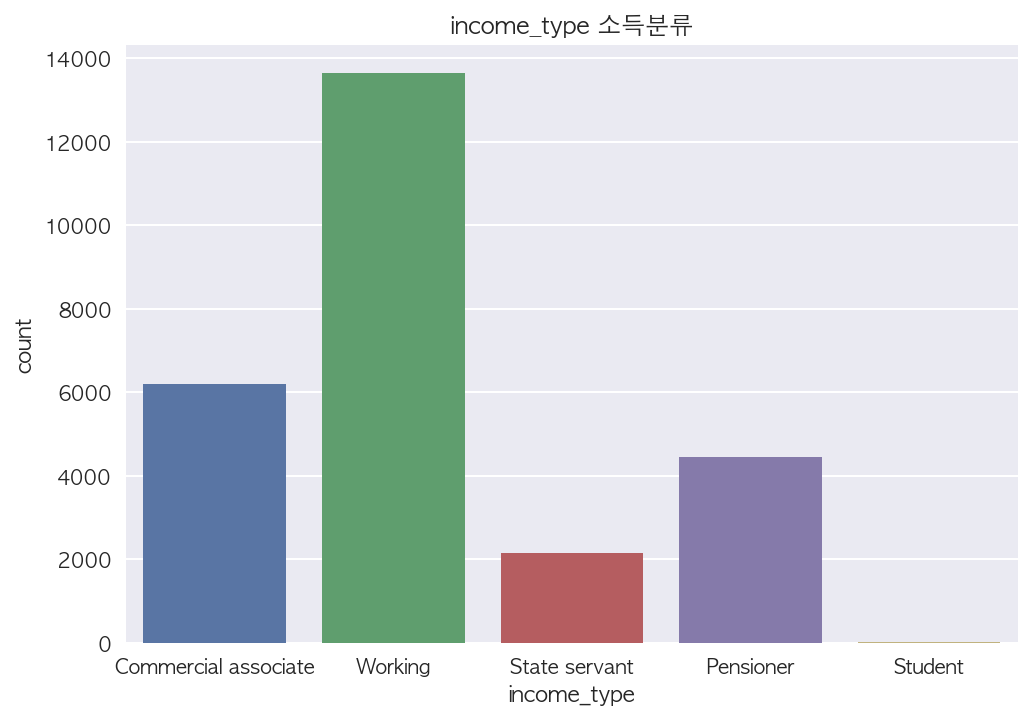

In [22]:
# income_type 소득 분류
print(train['income_type'].value_counts())
sns.countplot(data = train, x = 'income_type') 
plt.title('income_type 소득분류')
plt.show() 

student는 이상치처리(삭제) 하거나 전체적으로 스케일링 필요

In [23]:
income_type_key = list(train['income_type'].unique())


<AxesSubplot:xlabel='income_type', ylabel='income_total'>

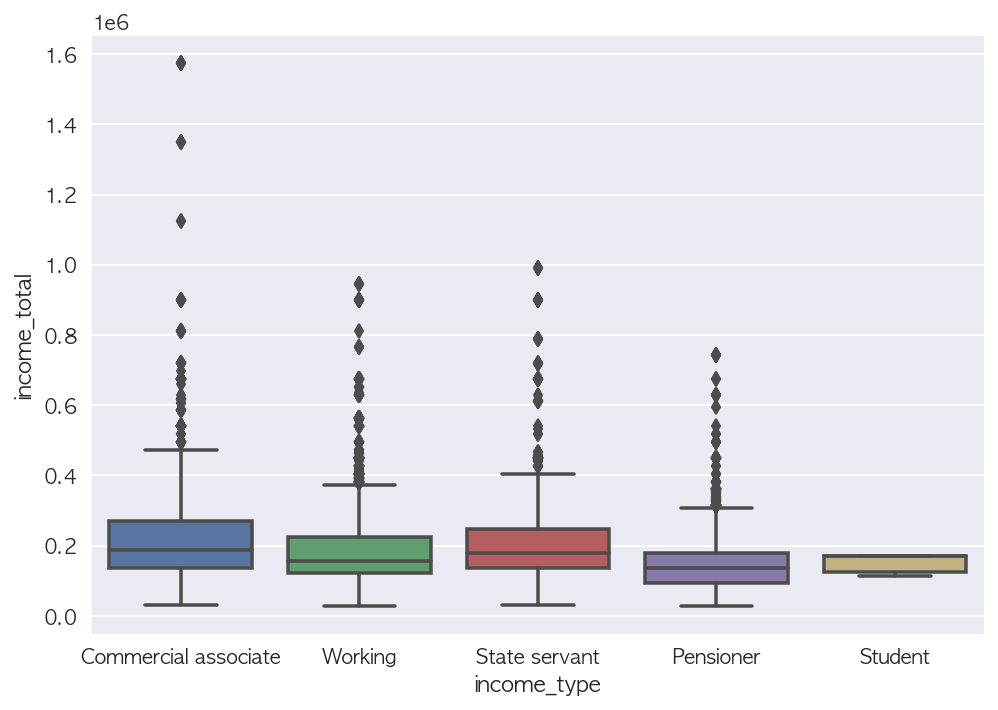

In [24]:
sns.boxplot(data = train, x = 'income_type', y = 'income_total') 
# 그룹별 통계값 추가

<AxesSubplot:xlabel='income_type', ylabel='income_total'>

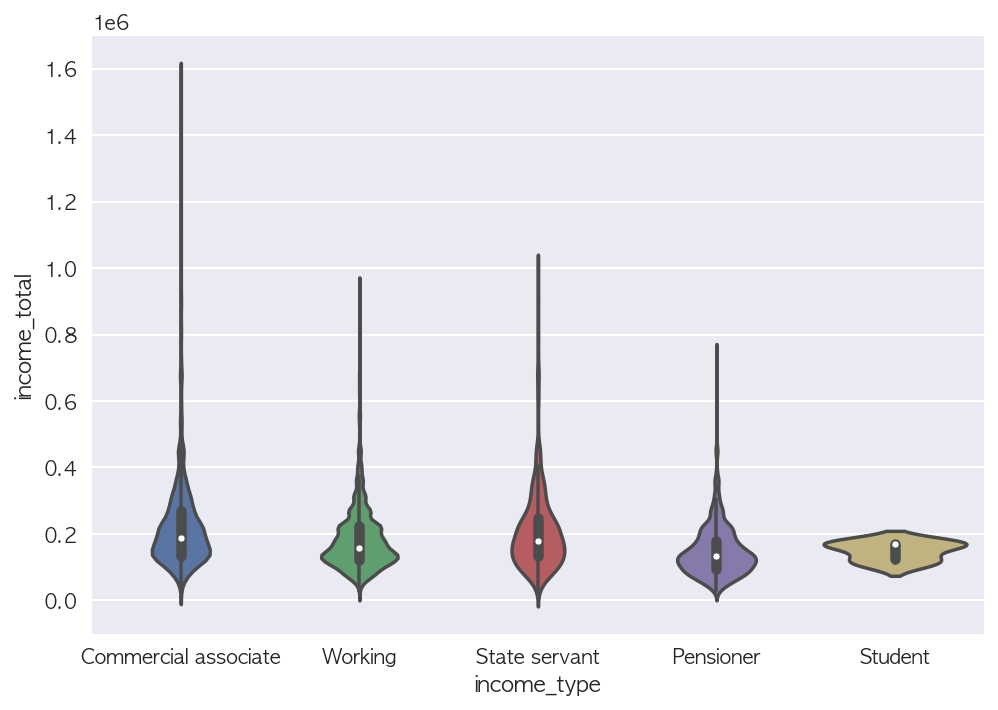

In [25]:
sns.violinplot(data = train, x = 'income_type', y = 'income_total') 

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64


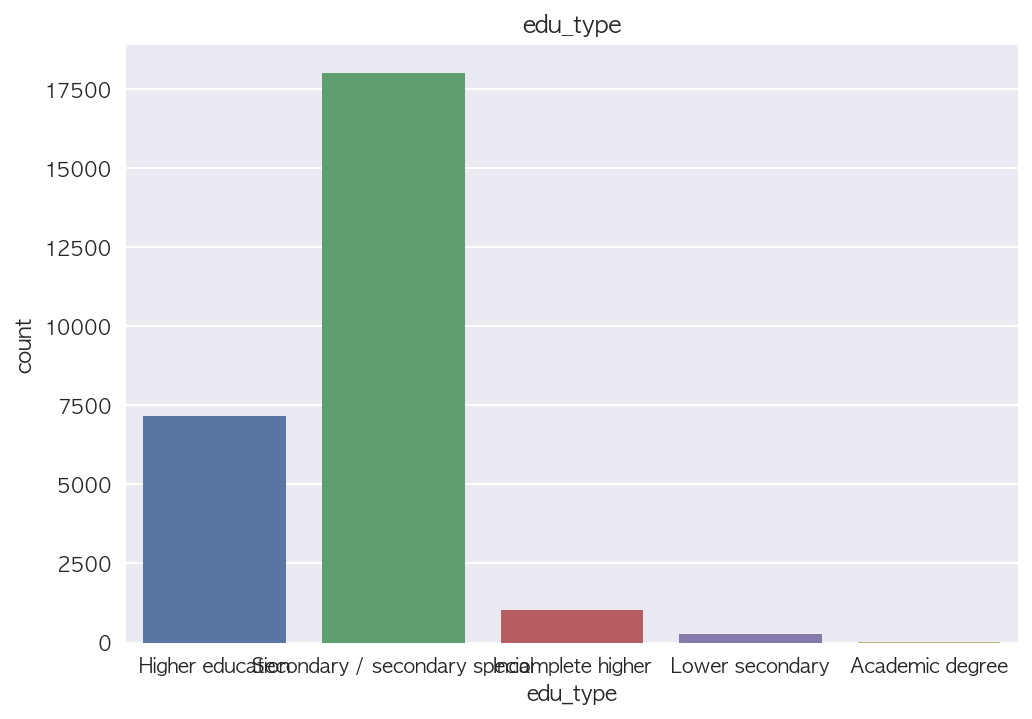

In [26]:
# edu_type 
print(train['edu_type'].value_counts())
sns.countplot(data = train, x = 'edu_type') 
plt.title('edu_type')
plt.show() 

edu_type 교육 수준도 데이터 불균형이 심함

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64


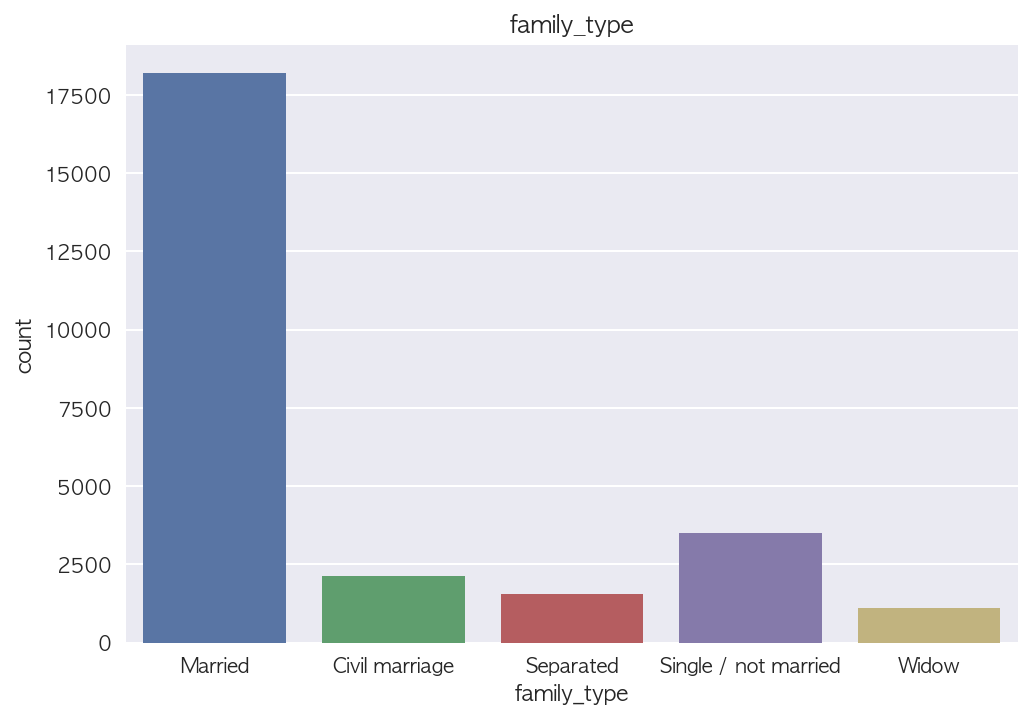

In [27]:
# family_type 
print(train['family_type'].value_counts())
sns.countplot(data = train, x = 'family_type') 
plt.title('family_type')
plt.show() 

범주화를 서로 묶을 수 없음 -> 각각 원핫인코딩 

불균형이 심함

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64


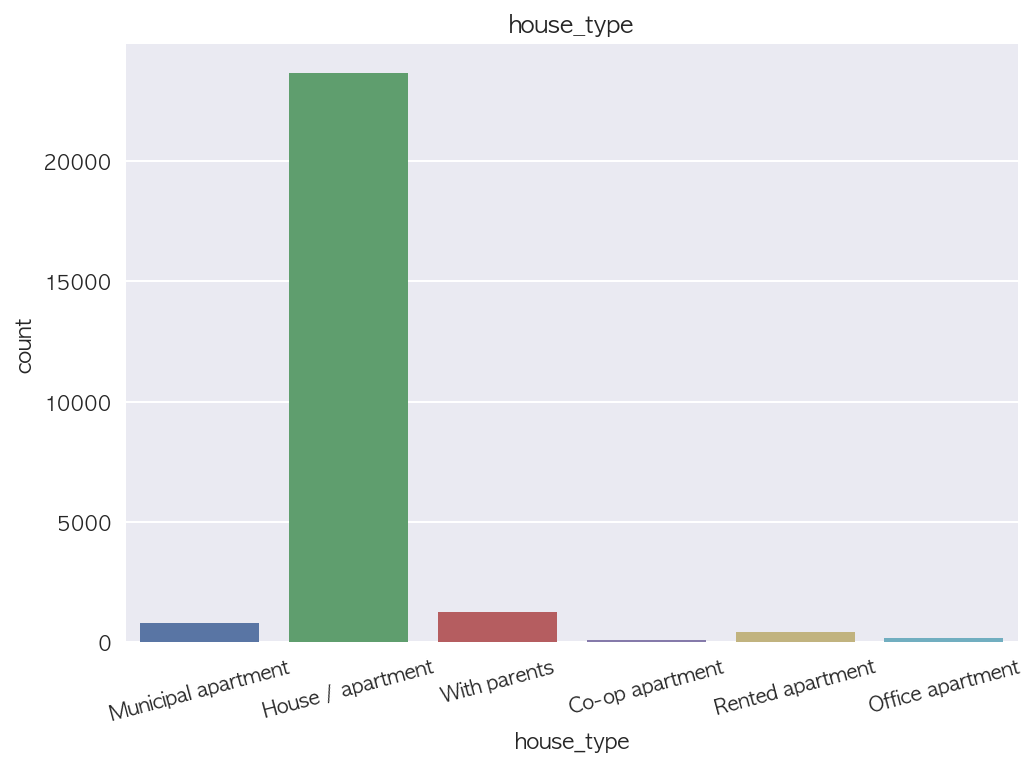

In [28]:
# house_type 
print(train['house_type'].value_counts())
house_type_plot = sns.countplot(data = train, x = 'house_type') 
house_type_plot.set_xticklabels(house_type_plot.get_xticklabels(),rotation = 15)
plt.title('house_type')
plt.show() 

-12676    40
-15519    38
-14667    32
-15140    26
-16768    24
          ..
-18629     1
-12786     1
-13688     1
-14543     1
-19912     1
Name: DAYS_BIRTH, Length: 6621, dtype: int64


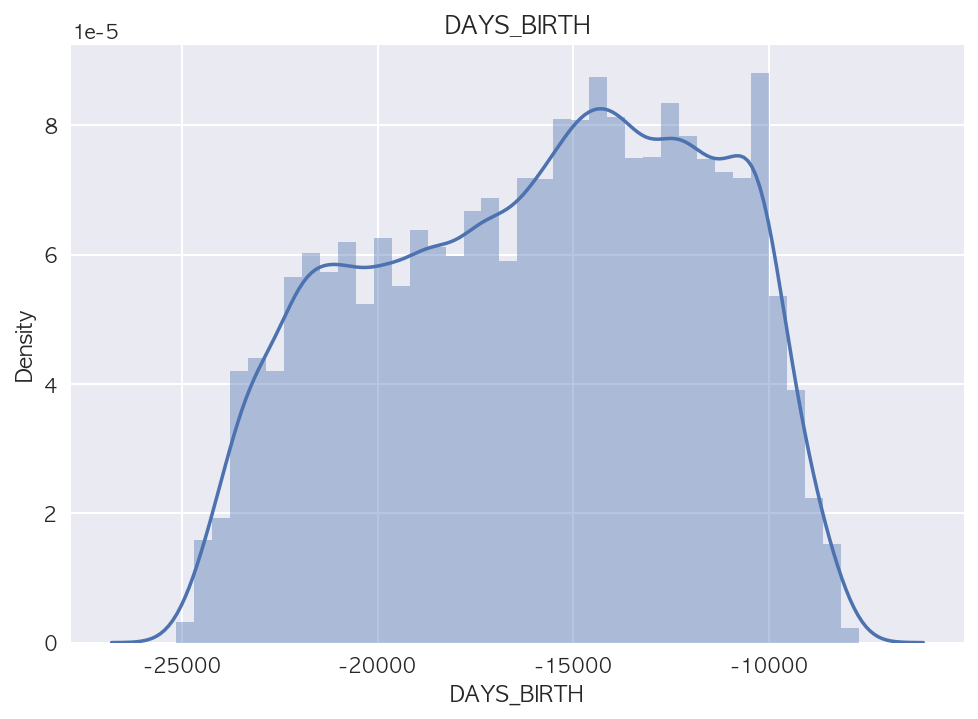

In [29]:
# DAYS_BIRTH 
print(train['DAYS_BIRTH'].value_counts())
sns.distplot(train['DAYS_BIRTH']) 
plt.title('DAYS_BIRTH')
plt.show() 

나이로 바꿔서 시각화 365로 나눠서!

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64


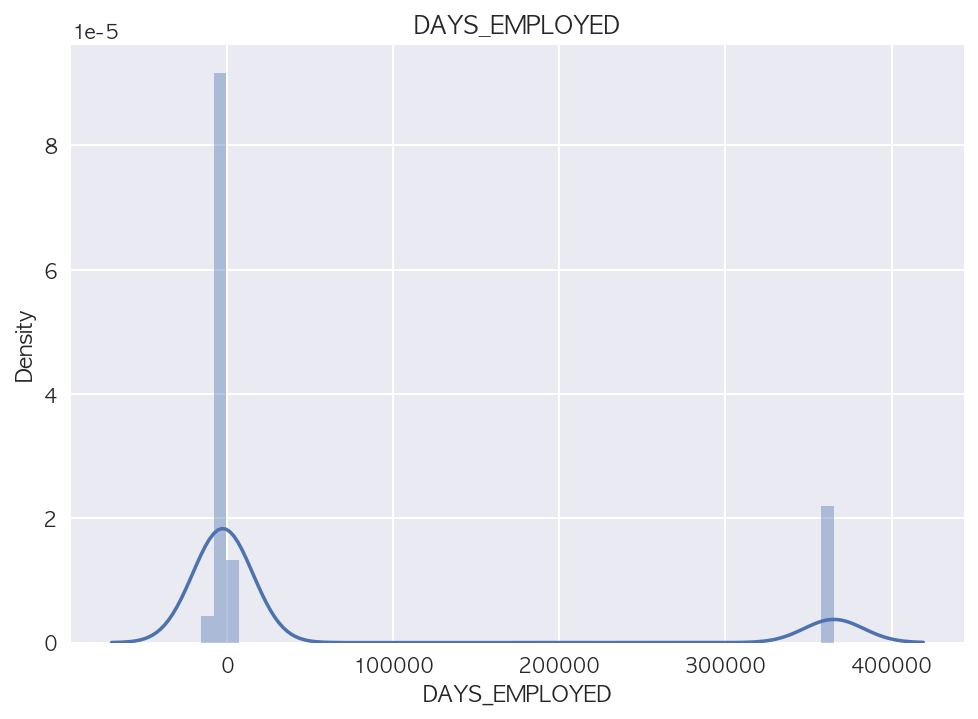

In [30]:
# DAYS_EMPLOYED 
print(train['DAYS_EMPLOYED'].value_counts())
sns.distplot(train['DAYS_EMPLOYED']) 
plt.title('DAYS_EMPLOYED')
plt.show() 

365243: 0으로 처리해야함 -> 없애고 시각화

1    26457
Name: FLAG_MOBIL, dtype: int64


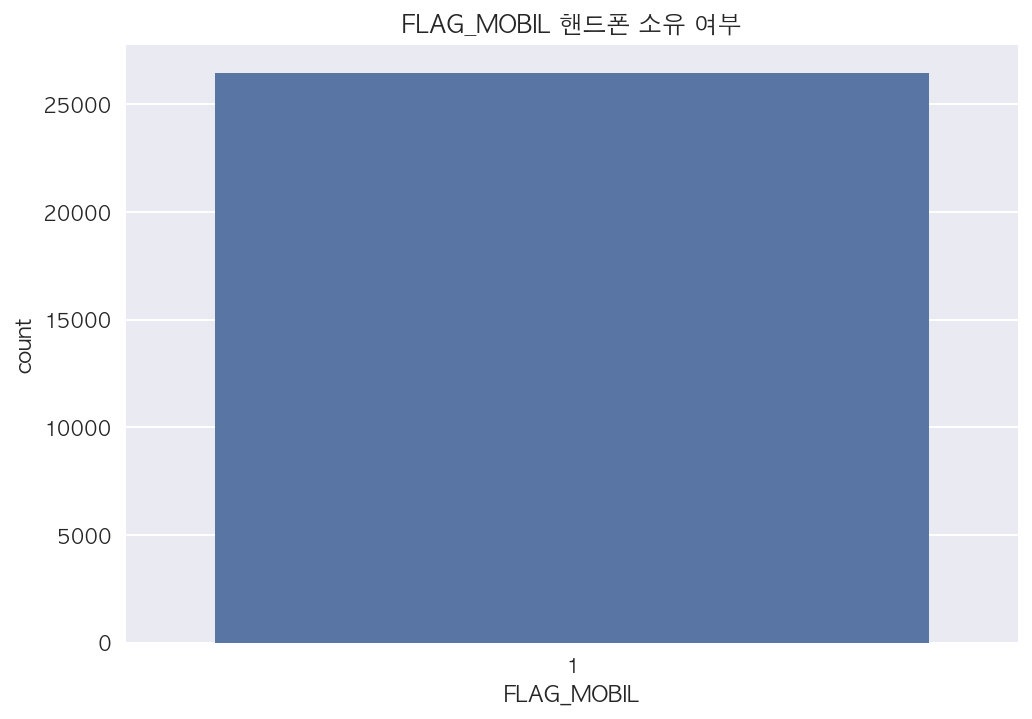

In [31]:
# FLAG_MOBIL 
print(train['FLAG_MOBIL'].value_counts())
sns.countplot(data = train, x = 'FLAG_MOBIL') 
plt.title('FLAG_MOBIL 핸드폰 소유 여부')
plt.show() 

FLAG_MOBIL: 1밖에 없음

0    20511
1     5946
Name: work_phone, dtype: int64


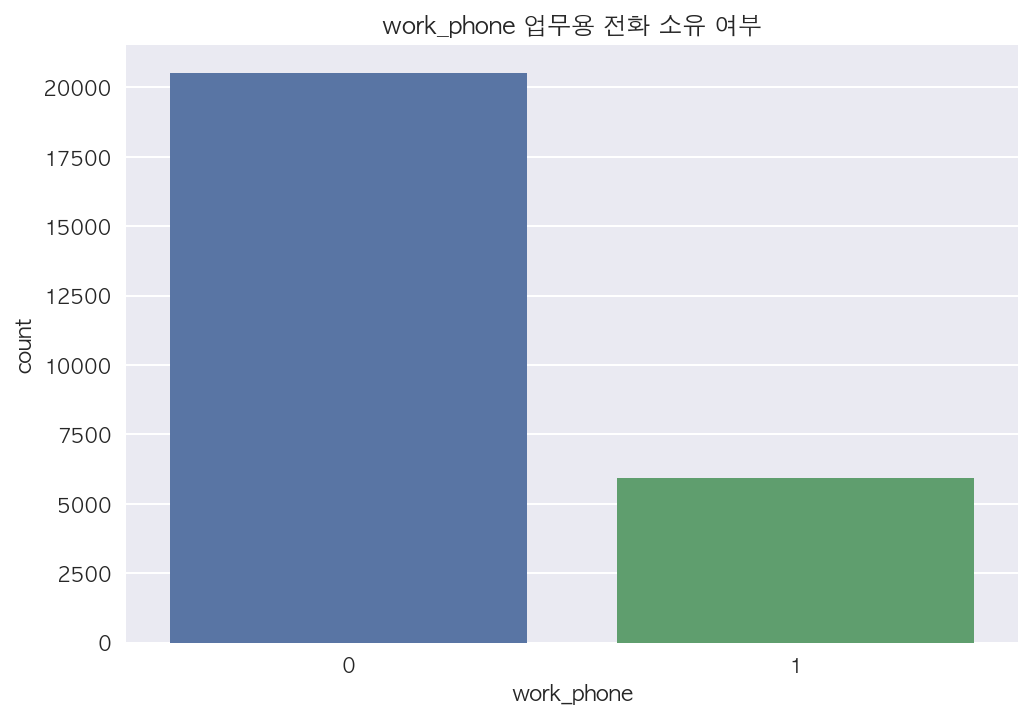

In [32]:
# work_phone 
print(train['work_phone'].value_counts())
sns.countplot(data = train, x = 'work_phone') 
plt.title('work_phone 업무용 전화 소유 여부')
plt.show() 

0    18672
1     7785
Name: phone, dtype: int64


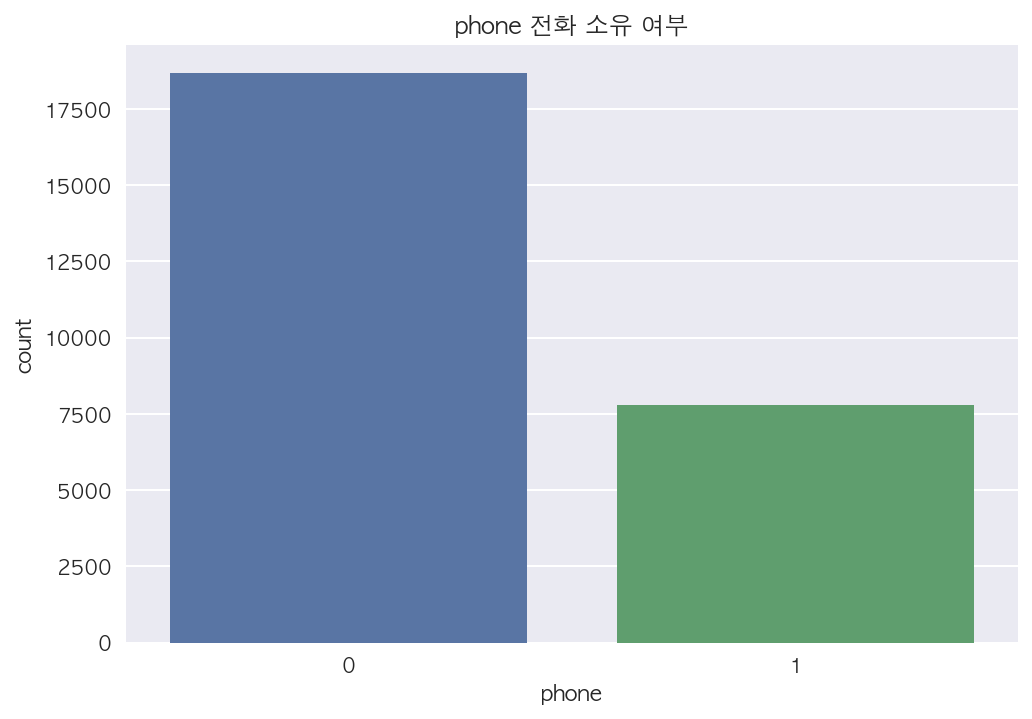

In [33]:
# phone 전화 소유 여부 (집전화??) 
print(train['phone'].value_counts())
sns.countplot(data = train, x = 'phone') 
plt.title('phone 전화 소유 여부')
plt.show() 

0    24042
1     2415
Name: email, dtype: int64


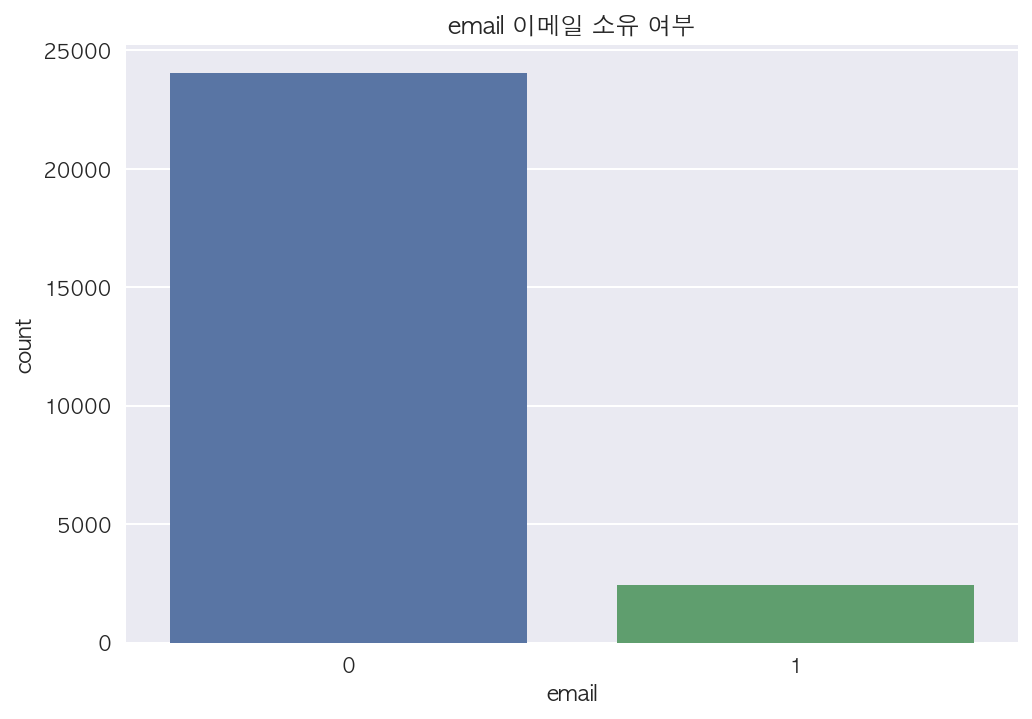

In [34]:
# email 이메일  
print(train['email'].value_counts())
sns.countplot(data = train, x = 'email') 
plt.title('email 이메일 소유 여부')
plt.show() 

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


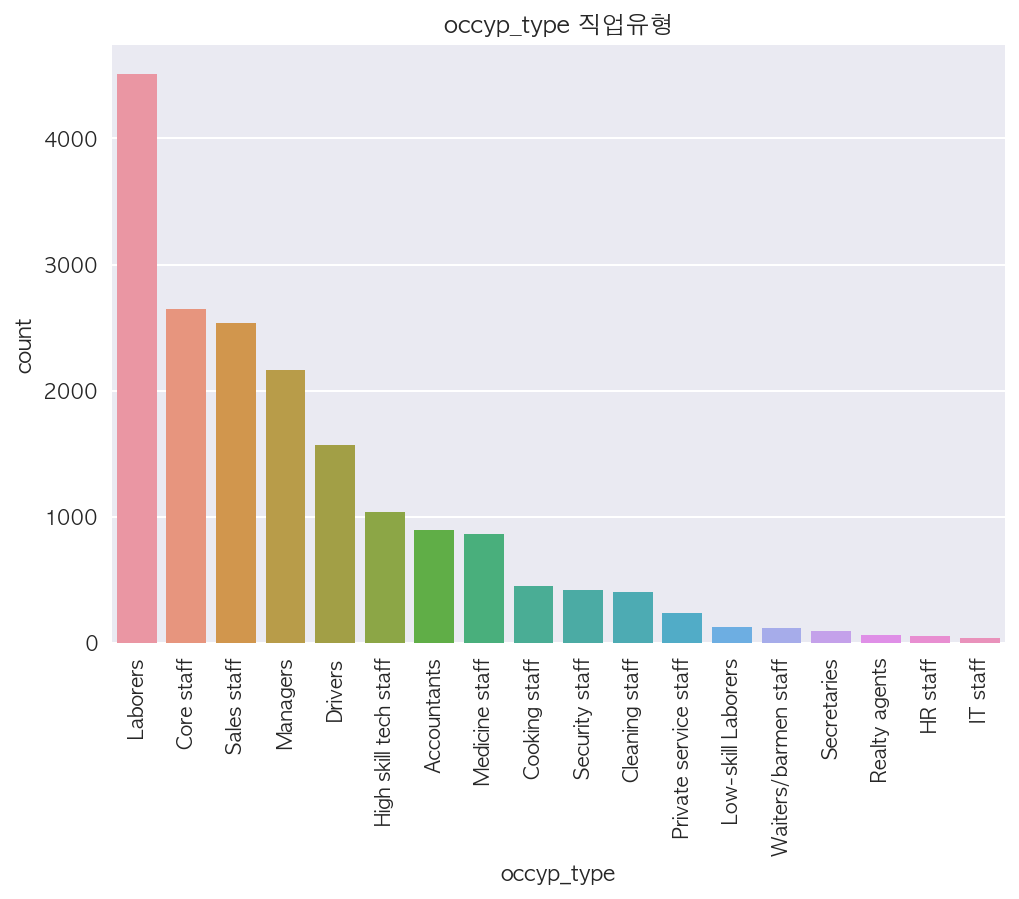

In [35]:
# occyp_type   
print(train['occyp_type'].value_counts())
occyp_type_plot = sns.countplot(data = train, x = 'occyp_type', order = train['occyp_type'].value_counts().index) 
occyp_type_plot.set_xticklabels(occyp_type_plot.get_xticklabels(),rotation = 90)
plt.title('occyp_type 직업유형')
plt.show() 


데이터 불균형 존재, 블루칼라, 화이트 칼라로 나누어야 하나???? -> 신용등급 직업 분류 도메인 지식 가져오기 -> 머신러닝

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


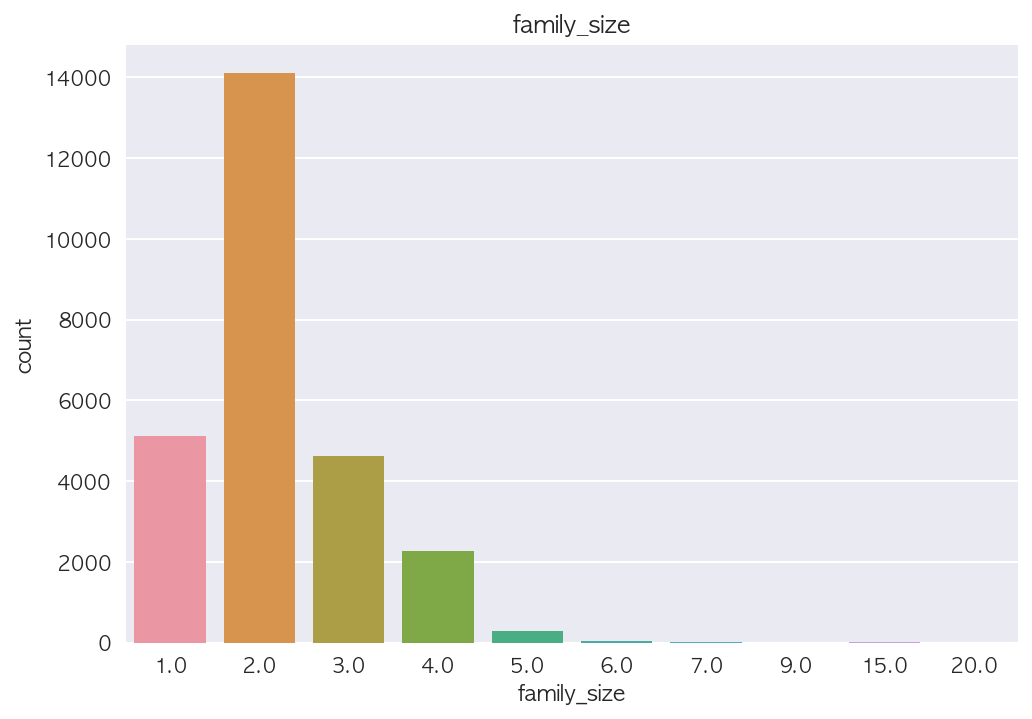

In [36]:
# family_size 
print(train['family_size'].value_counts())
sns.countplot(data = train, x = 'family_size') 
plt.title('family_size')
plt.show() 

-7.0     662
-11.0    617
-8.0     612
-3.0     593
-6.0     591
        ... 
-58.0    244
-59.0    242
-60.0    235
 0.0     231
-57.0    228
Name: begin_month, Length: 61, dtype: int64


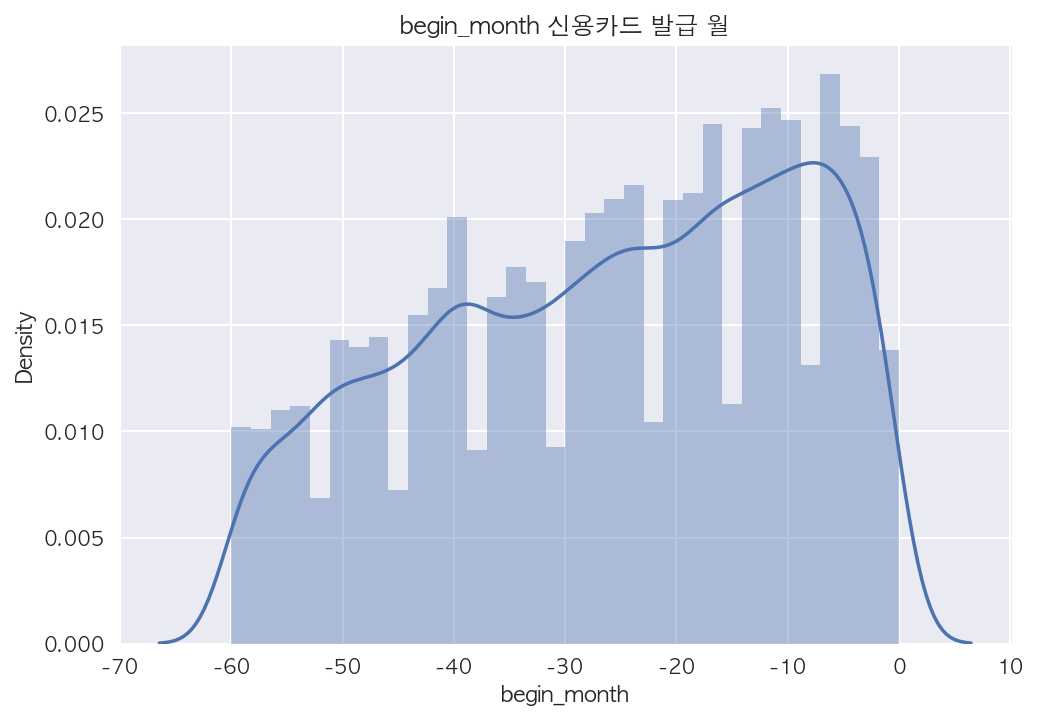

In [37]:
# begin_month 신용카드 발급 월 
print(train['begin_month'].value_counts())
sns.distplot(train['begin_month']) 
plt.title('begin_month 신용카드 발급 월')
plt.show() 

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64


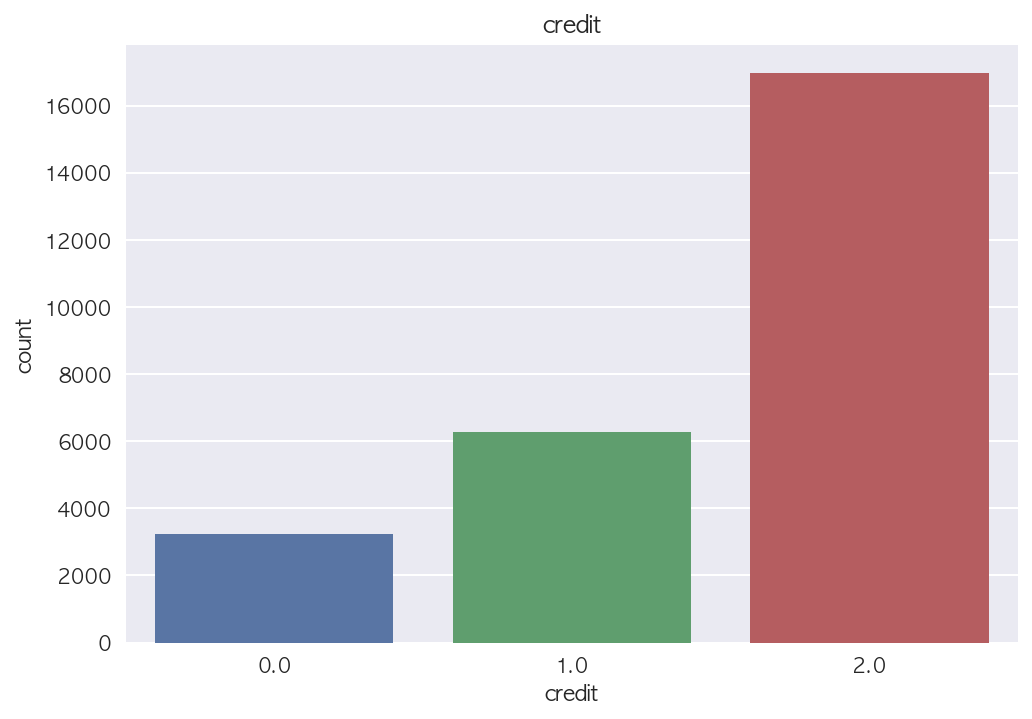

In [38]:
# family_size 
print(train['credit'].value_counts())
sns.countplot(data = train, x = 'credit') 
plt.title('credit')
plt.show() 

타겟데이터의 불균형이 심함 모델 트레이닝할 때 랜덤샘플링으로 층화추출 사용해야함 

전처리 전 
칼럼 - credit 상관관계 그래프

## Preprocess for Analysis

In [39]:
df = pd.read_csv('train.csv')

data = df.drop(['FLAG_MOBIL'], axis=1).copy()
data['income_total'] = data['income_total'].astype(int)
data['credit'] = data['credit'].astype(int)

data = data[data['occyp_type'].notnull() | (data['DAYS_EMPLOYED'] > 0)]
data['occyp_type'] = data['occyp_type'].fillna('Unemployeed')

data['child_num'] = data['child_num'].apply(lambda x: 4 if x > 4 else x)
data['family_size'] = data['family_size'].apply(lambda x: 6 if x > 6 else x)
data['family_size'] = data['family_size'].astype(int)

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x: (x*-1)//365 if x < 0 else 0)
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x: (x*-1)//365 if x < 0 else 0)
data['begin_month'] = data['begin_month'].apply(lambda x: int(x*-1) if x < 0 else 0)

data.rename(columns={'DAYS_BIRTH':'age','DAYS_EMPLOYED':'employed_year'}, inplace=True)

data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,age,employed_year,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,1,F,N,Y,1,247500,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31,4,0,0,1,Laborers,3,5,1
2,2,M,Y,Y,0,450000,Working,Higher education,Married,House / apartment,52,12,0,1,0,Managers,2,22,2
3,3,F,N,Y,0,202500,Commercial associate,Secondary / secondary special,Married,House / apartment,41,5,0,1,0,Sales staff,2,37,0
4,4,F,Y,Y,0,157500,State servant,Higher education,Married,House / apartment,41,5,0,0,0,Managers,2,26,2
5,5,F,N,Y,2,270000,Working,Secondary / secondary special,Married,House / apartment,36,13,0,0,1,High skill tech staff,4,18,1


In [40]:
# child_num, : 자녀 수 4이상 한 카테고리로 묶음
# family_size, 가족 수 6이상 한 카테고리로 묶음
# age : Days birth -1곱하고 365로 나누어 나이로 환산
# employed_year: days_employed -1 곱하고 365로 나누어 나이로 환산
# begin_month: 가입달 수 0보다 작을 경우 -1 곱해서 양수로 환산, 그외 양수는 0으로 처리

In [41]:
data['income_total'].describe()

count    2.272400e+04
mean     1.864610e+05
std      1.011254e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

In [42]:
type(data['income_total'])

pandas.core.series.Series

In [43]:
# 정수 단위로 출력
pd.options.display.float_format = "{:.0f}".format

135000    2742
157500    1927
180000    1922
112500    1874
225000    1829
          ... 
92250        1
215100       1
531000       1
184135       1
191700       1
Name: income_total, Length: 234, dtype: int64
count     22724
mean     186461
std      101125
min       27000
25%      121500
50%      157500
75%      225000
max     1575000
Name: income_total, dtype: float64


Text(0.5, 1.0, 'income_total 수입')

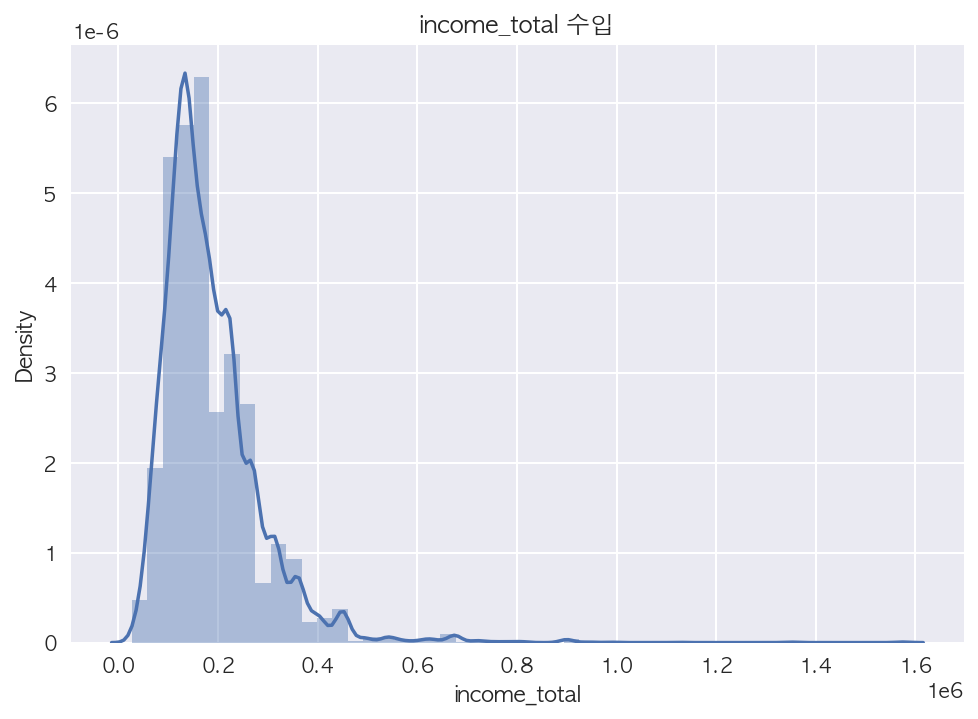

In [44]:
print(data['income_total'].value_counts())
print(data['income_total'].describe())
sns.distplot(data['income_total'])
plt.title('income_total 수입')
# plt.ticklabel_format(style = 'plain', axis = 'y') 

135000    2742
157500    1927
180000    1922
112500    1874
225000    1829
          ... 
92250        1
215100       1
531000       1
184135       1
191700       1
Name: income_total, Length: 234, dtype: int64


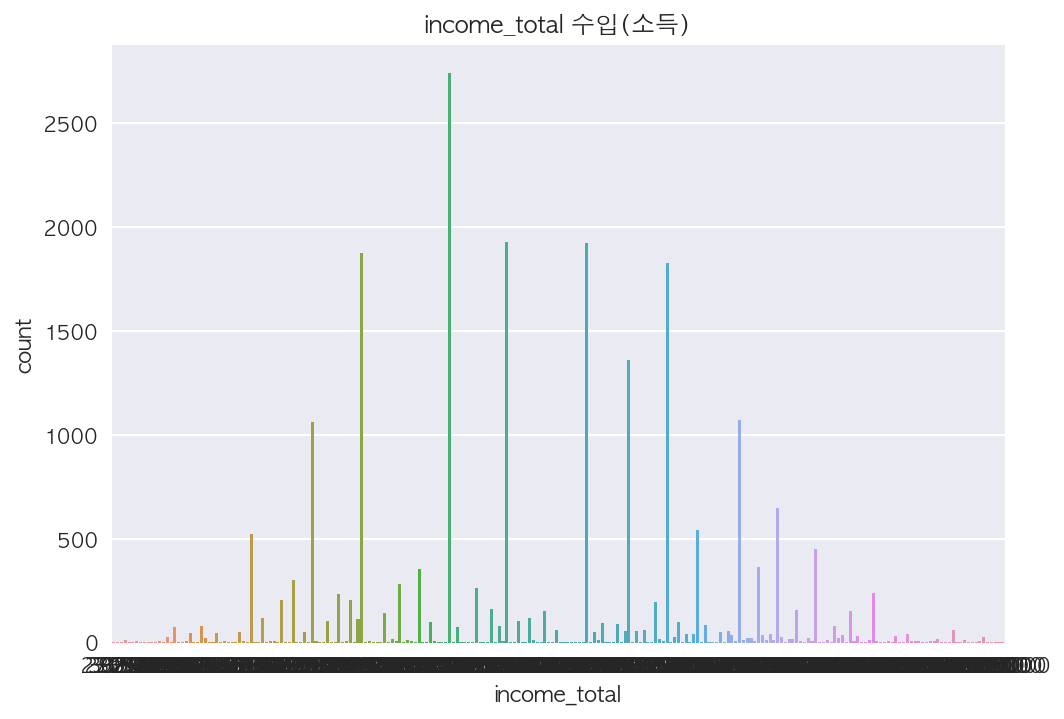

In [45]:
# income_total 
print(data['income_total'].value_counts())
sns.countplot(data = data, x = 'income_total')
# occyp_type_plot.set_xticklabels(occyp_type_plot.get_xticklabels(),rotation = 90)
plt.title('income_total 수입(소득)')
plt.show() 

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


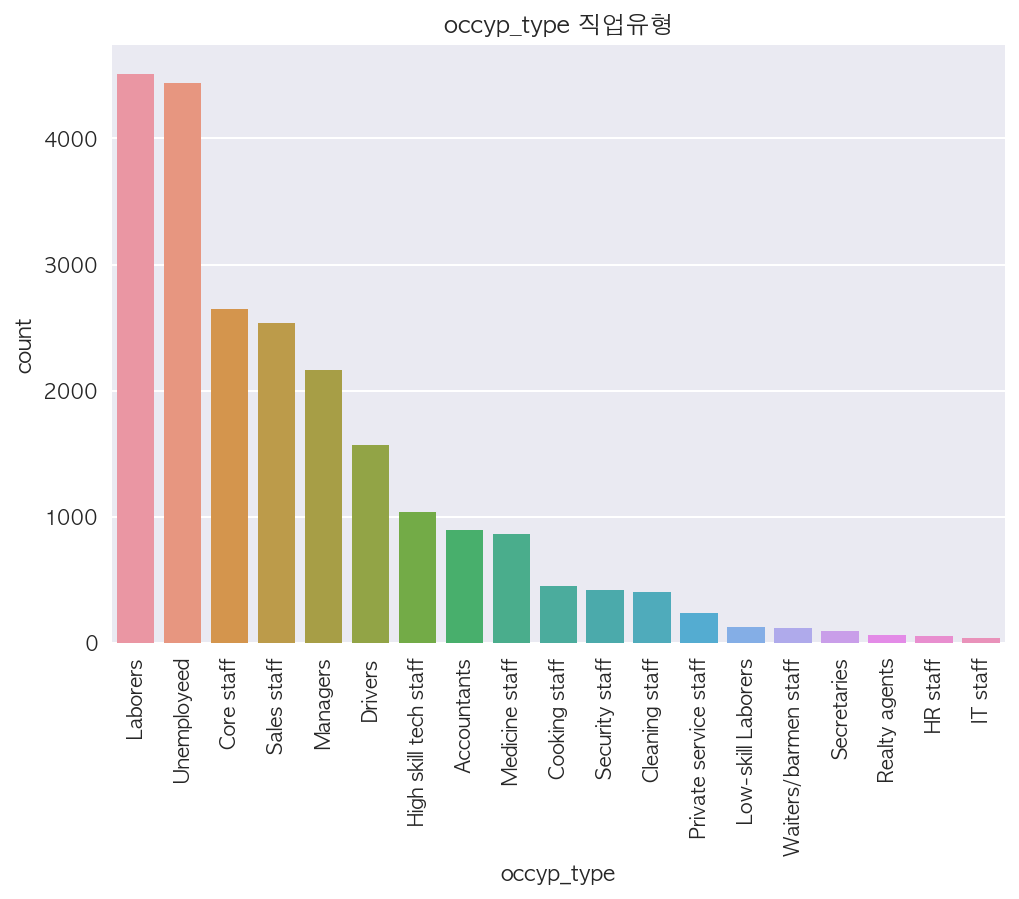

In [46]:
# occyp_type   
print(train['occyp_type'].value_counts())
occyp_type_plot = sns.countplot(data = data, x = 'occyp_type', order = data['occyp_type'].value_counts().index) 
occyp_type_plot.set_xticklabels(occyp_type_plot.get_xticklabels(),rotation = 90)
plt.title('occyp_type 직업유형')
plt.show() 

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64


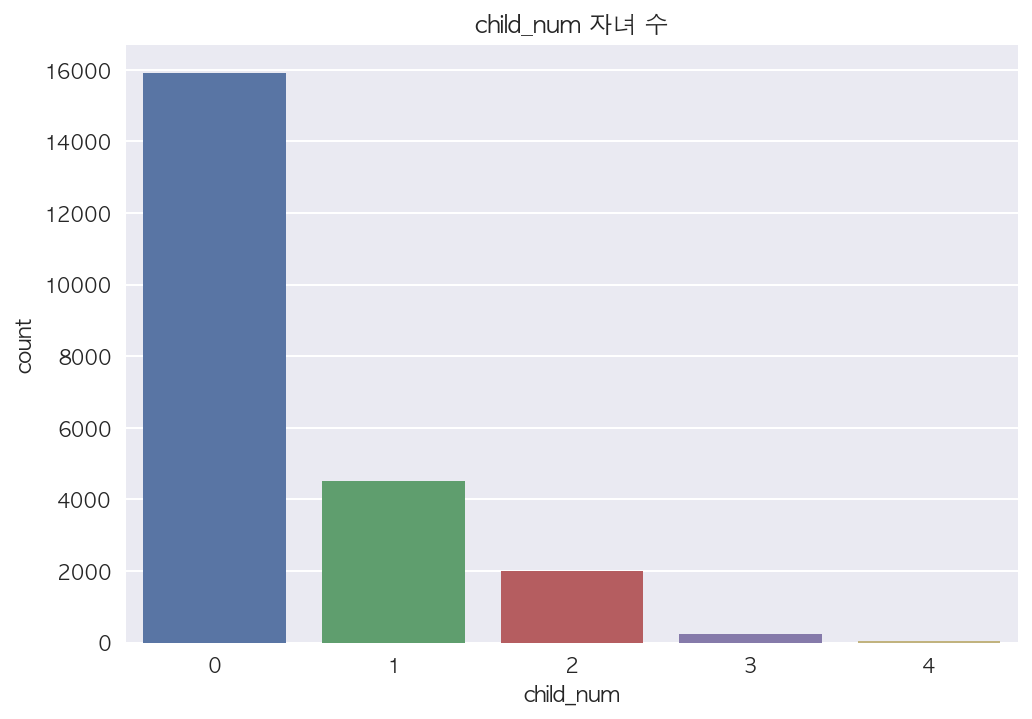

In [47]:
# child_num 자녀수
print(train['child_num'].value_counts())
sns.countplot(data = data, x = 'child_num') 
plt.title('child_num 자녀 수')
plt.show() 

2     14106
1      5109
3      4632
4      2260
5       291
6        44
7         9
15        3
9         2
20        1
Name: family_size, dtype: int64


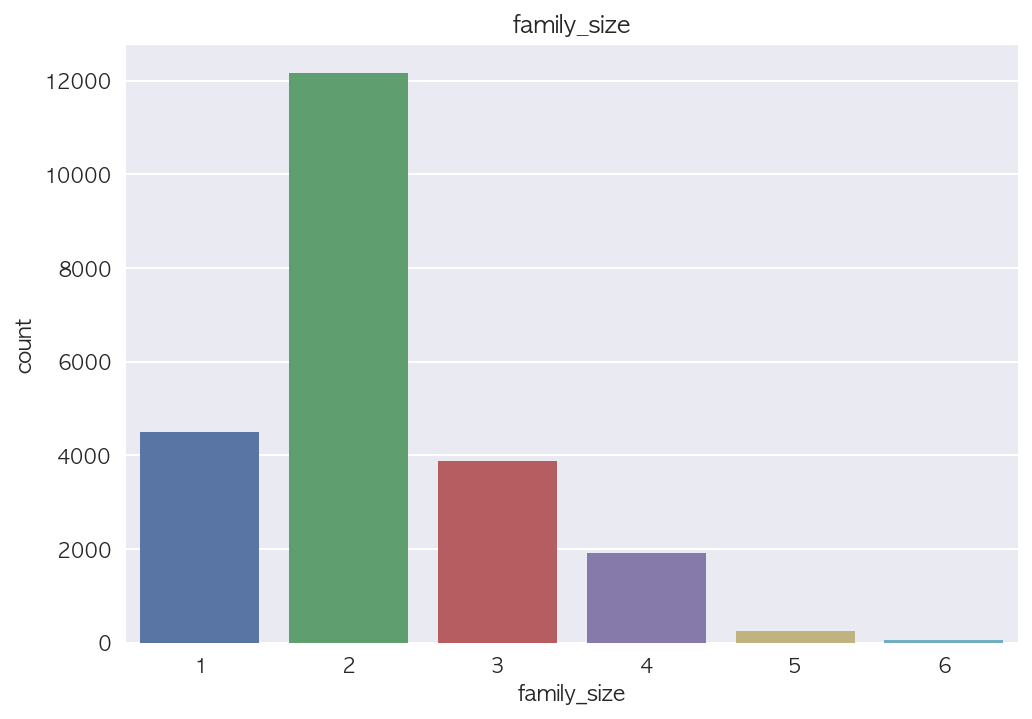

In [48]:
# family_size 
print(train['family_size'].value_counts())
sns.countplot(data = data, x = 'family_size') 
plt.title('family_size')
plt.show() 

Text(0.5, 1.0, 'age 나이')

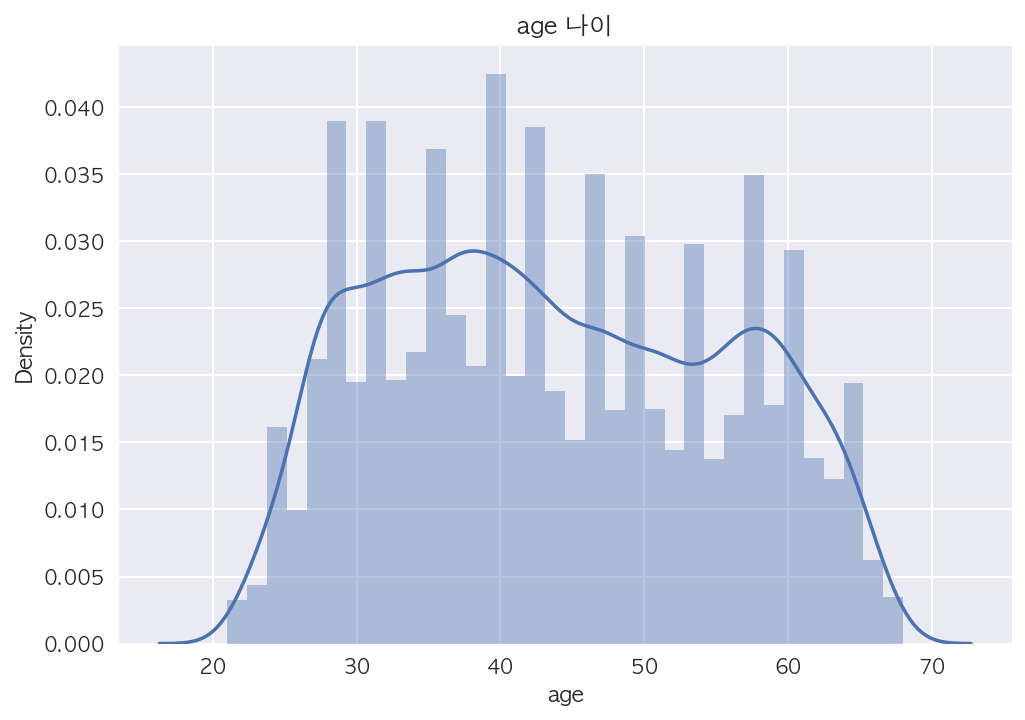

In [49]:
sns.distplot(data['age'])
plt.title('age 나이')
# plt.ticklabel_format(style = 'plain', axis = 'y')

Text(0.5, 1.0, 'employed_year 경력')

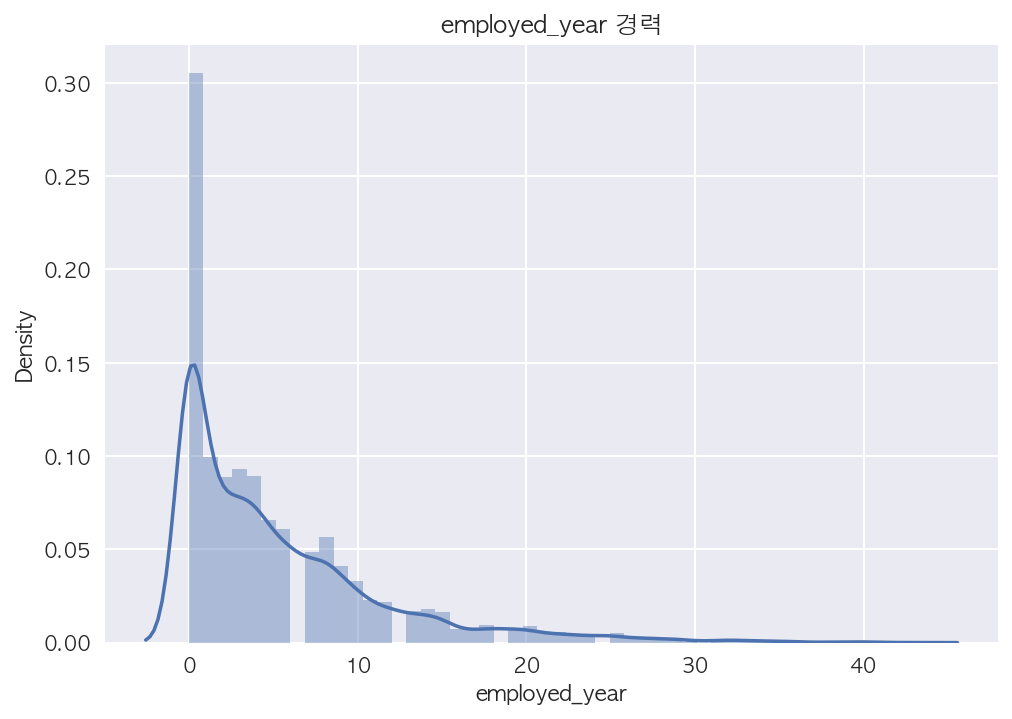

In [50]:
sns.distplot(data['employed_year'])
plt.title('employed_year 경력')

Text(0.5, 1.0, 'begin_month 가입달 수')

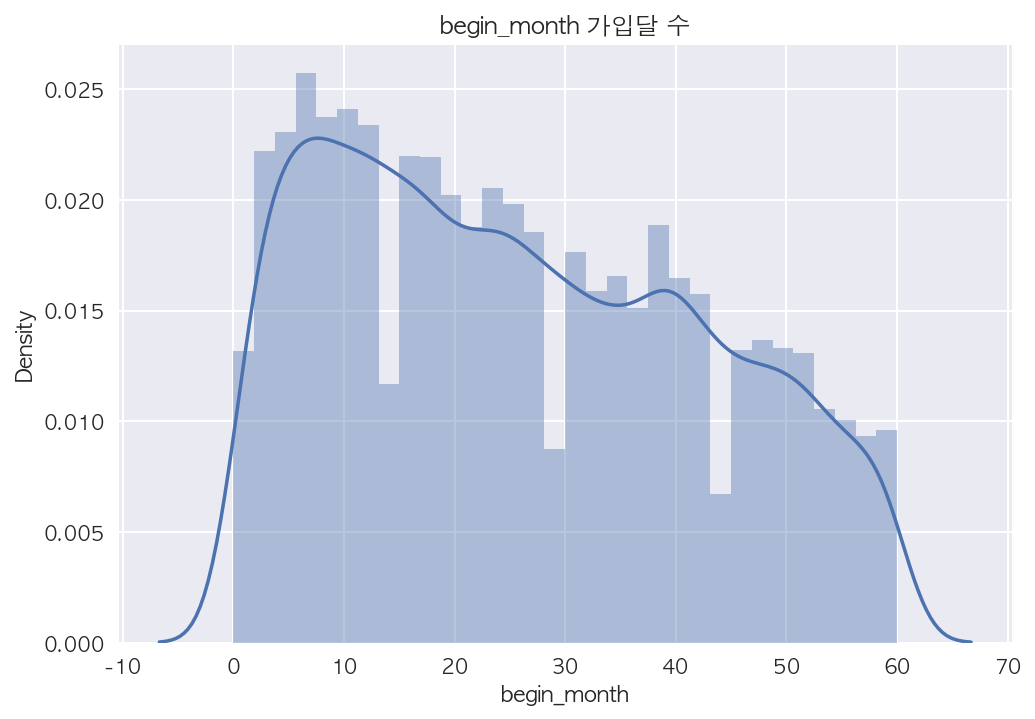

In [51]:
sns.distplot(data['begin_month'])
plt.title('begin_month 가입달 수')

In [52]:
train_cat = pd.read_csv('../credit_data/train_cat_data.csv')

In [53]:
train_cat.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_range',
       'income_type', 'edu_type', 'family_type', 'house_type', 'age_range',
       'employed_range', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_range', 'credit'],
      dtype='object')

In [54]:
train_cat.begin_range

0        0
1        3
2        6
3        4
4        2
        ..
22719    7
22720    0
22721    4
22722    9
22723    1
Name: begin_range, Length: 22724, dtype: int64

In [55]:
train_cat.begin_range.describe()

count   22724
mean        4
std         3
min         0
25%         1
50%         3
75%         6
max         9
Name: begin_range, dtype: float64